<a href="https://colab.research.google.com/github/SaraPMC/fiap-deep-learning/blob/main/TrabalhoFinal/Exercicio5/TrabalhoFinal_RedesNeuraisConvolucionais_Ex5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Redes Neurais Convolucionais**

**Exercício #5**

Inicialmente os alunos deverão escolher entre 4 datasets:

1.   Selecionar 15 frutas distintas do dataset fruits 360 (Fácil)
2.   Selecionar todas as frutas do dataset fruits 360 (Médio). Disponível em:
https://www.dropbox.com/s/kzhuv6xim8ejxp3/fruits.zip?dl=0
3. CoronaHack -Chest X-Ray-Dataset (Médio):
Classificar apenas se existe Pneumonia ou Não, opcionalmente classificar a existência de COVID-19. Disponível em:
https://www.dropbox.com/s/zmo4c6pzwcgd9c4/562468_1022626_bundle_archive.zip?
dl=0
4. Dataset Skin Cancer MNIST: HAM10000 (difícil). Disponível em: https://www.dropbox.com/s/8o4ysiccspp46ov/skincancer-
mnist-ham10000.zip?dl=0

Com o dataset selecionado deve-se construir uma CNN para a classificação das imagens do dataset selecionado.

Instruções Gerais:

• Utilize a LetNet-5 como exemplo inicial bem como o exemplo visto em salada de aula do dataset minst;

• Inicie o trabalho com parte do dataset vá adicionando gradativamente mais tipos distintos de frutos;

• É permitido usar outras abordagens e arquiteturas;

• É permitido o uso de Autoencoders;

• É obrigatório o uso de CNN;

• É permitido o uso de técnicas de processamento de imagens;

• Não é permitido o uso de modelos pré-treinados;

• Faça uma boa distribuição dos dados de teste e treinamento e validação;

• Aplique os pré-processamentos necessários.

• Apresente a evolução do conjunto de treino e validação.

• Apresente a acurácia do conjunto de testes (opcional).

• O conjunto de teste deve variar entre 20% e 30% do conjunto total de treinamento e deve ter a mesma proporção da quantidade de amostras por classes de forma aleatório. Para o dataset fruits360 o conjunto precisa ser construído, em outras palavras é necessário fazer uma rotina que faça isso, selecionando imagens de forma aleatória e respeitando a proporcionalidade de amostras por
classes (todo tipo de fruta deve ter a mesma quantidade).

• Apresente a configuração (estrutura) da rede neural.

Dicas:

Utilize as instruções de leituras de diretórios de imagens do próprio Keras
(semelhante ao exemplo visto com o dataset de dígitos):

train_datagen =
preprocessing.image.ImageDataGenerator(validation_split=0.20)
train_generator = train_datagen.flow_from_directory('Dataset', batch_size=200, color_mode = 'grayscale',
target_size=(30, 30))

#DataSet Fruits 360

In [4]:
#Baixando o repositório do git
!git clone https://github.com/SaraPMC/fiap-deep-learning.git

Cloning into 'fiap-deep-learning'...
remote: Enumerating objects: 81115, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 81115 (delta 11), reused 3 (delta 0), pack-reused 81089
Receiving objects: 100% (81115/81115), 698.76 MiB | 35.14 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Checking out files: 100% (81256/81256), done.


In [5]:
#Import das bibliotecas
import os
import cv2
import random
import numpy as np 
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model 								   
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical				       				         
from tensorflow.keras import optimizers


In [6]:
#diretorios
fruitsTrainingFolder = "/content/fiap-deep-learning/TrabalhoFinal/Exercicio5/fruits360/Training"
fruitsTestFolder = "/content/fiap-deep-learning/TrabalhoFinal/Exercicio5/fruits360/Test"

#lista das frutas
fruitsNames = os.listdir(fruitsTrainingFolder)
print(fruitsNames)

['Apple Red Yellow 2', 'Orange', 'Cherry Wax Red', 'Kiwi', 'Pitahaya Red', 'Tomato 3', 'Tomato Cherry Red', 'Salak', 'Mandarine', 'Apple Granny Smith', 'Nectarine', 'Nut Pecan', 'Kaki', 'Apple Braeburn', 'Tomato 1', 'Pear Kaiser', 'Clementine', 'Strawberry', 'Pomelo Sweetie', 'Kohlrabi', 'Rambutan', 'Pepper Yellow', 'Tomato Maroon', 'Guava', 'Strawberry Wedge', 'Onion White', 'Tangelo', 'Cauliflower', 'Apple Red 1', 'Lychee', 'Physalis', 'Tomato 4', 'Potato White', 'Onion Red Peeled', 'Pineapple', 'Cherry 1', 'Grape White', 'Pear Abate', 'Peach Flat', 'Pear Williams', 'Ginger Root', 'Mangostan', 'Apple Golden 1', 'Lemon Meyer', 'Pepper Red', 'Walnut', 'Peach 2', 'Carambula', 'Papaya', 'Cantaloupe 1', 'Apple Red Delicious', 'Potato Sweet', 'Dates', 'Granadilla', 'Peach', 'Grape Pink', 'Grape Blue', 'Lemon', 'Pepino', 'Avocado', 'Kumquats', 'Maracuja', 'Grapefruit White', 'Apple Red 2', 'Apple Red 3', 'Plum 2', 'Pear', 'Apple Pink Lady', 'Plum', 'Cactus fruit', 'Banana Red', 'Redcurrant'

In [7]:
#Lendo o dataset de treino
imgTrain = []

for fruitName in fruitsNames:
  path = os.path.join(fruitsTrainingFolder, fruitName)
  num = fruitsNames.index(fruitName)
  for img in os.listdir(path):
    if (img.endswith('jpg') and not img.startswith('.')):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      imgTrain.append([img_array, num])

print("Total de imagens de treino: ", len(imgTrain))

Total de imagens de treino:  60498


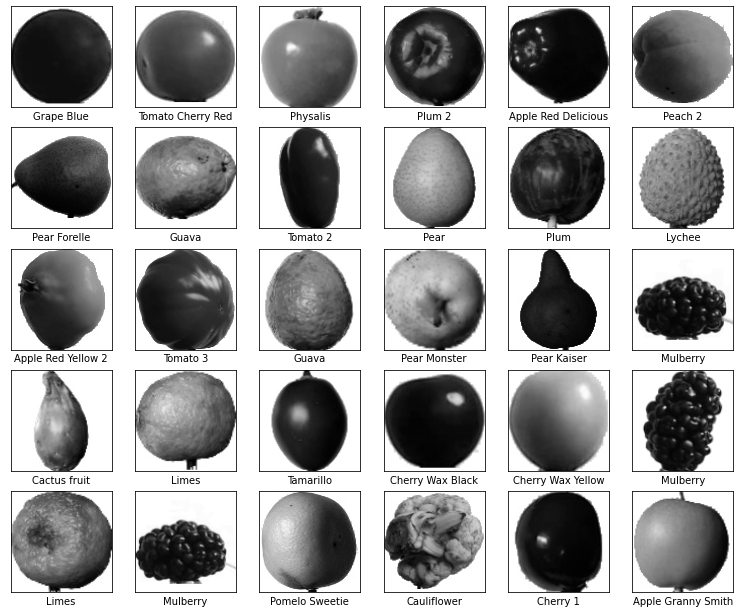

In [8]:
#Plotando imagens aleatórias do dataset de treino
imgIndex = random.sample(range(len(imgTrain)), 30)
imgIndex = np.array(imgIndex)

plt.figure(figsize=(13, 13))
for i in range(30):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgTrain[imgIndex[i]][0], cmap='gray')
    plt.xlabel(fruitsNames[imgTrain[imgIndex[i]][1]])
plt.show()

In [9]:
#Lendo o dataset de teste
imgTest = []

for fruitName in fruitsNames:
  path = os.path.join(fruitsTestFolder, fruitName)
  num = fruitsNames.index(fruitName)
  for img in os.listdir(path):
    if (img.endswith('jpg') and not img.startswith('.')):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      imgTest.append([img_array, num])

print("Total de imagens de teste: ", len(imgTest))

Total de imagens de teste:  20622


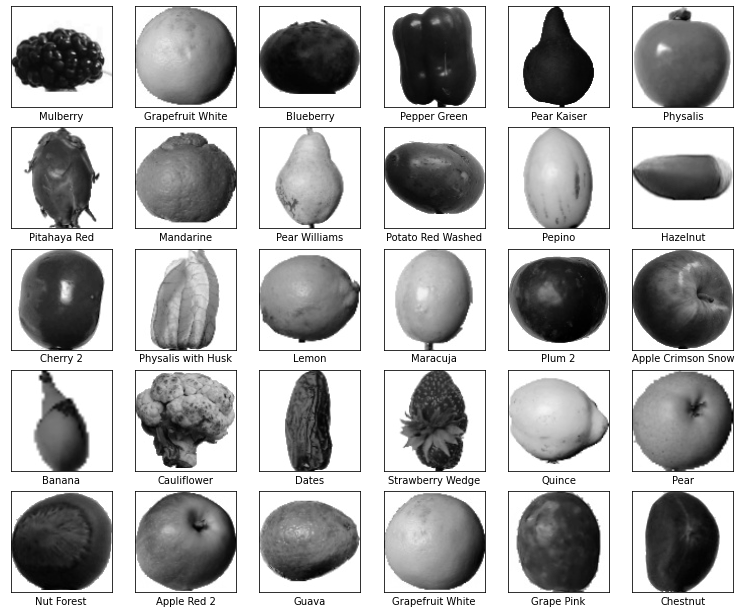

In [10]:
#Plotando imagens aleatórias do dataset de treino
imgIndex = random.sample(range(len(imgTest)), 30)
imgIndex = np.array(imgIndex)

plt.figure(figsize=(13, 13))
for i in range(30):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgTest[imgIndex[i]][0], cmap='gray')
    plt.xlabel(fruitsNames[imgTest[imgIndex[i]][1]])
plt.show()

In [11]:
#Para melhor acurácia, embaralha o dataset antes do treino

x_train = [] #array para as imagens de treino
y_train = [] #array para as labels de treino

random.shuffle(imgTrain) #mistura as imagens de treino

for features, label in imgTrain:
	x_train.append(features)
	y_train.append(label)
x_train = np.array(x_train)
 
x_test = [] #array para as imagens de teste
y_test = []	 #array para as labels de teste

random.shuffle(imgTest) #mistura as imagens de teste

for features, label in imgTest:
	x_test.append(features)
	y_test.append(label)
x_test = np.array(x_test)

In [12]:
#Remodela e normaliza os dados antes do treino
imgSize = 100
x_train = x_train.reshape(-1, imgSize, imgSize, 1)
mean_train = np.mean(x_train, axis=0)
x_train = x_train-mean_train
x_train = x_train/255

x_test = x_test.reshape(-1, imgSize, imgSize, 1)
mean_test = np.mean(x_test, axis=0)
x_test = x_test-mean_test
x_test = x_test/255

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

print(x_train.shape)
print(x_test.shape)

(60498, 100, 100, 1)
(20622, 100, 100, 1)


## Configurando as camadas e treinando o modelo

###Setando os Parametros

In [13]:
input_shape = x_train.shape[1:]
filters_numbers = [16, 32, 64]
filters_size = [[5,5],[4,4],[3,3]]

pool_size=(2, 2)
weight_decay = 5e-4
dropout = 0.6
lr = 0.001
momentum = 0.9

epochs = 10
batch_size = 32

L2_norm = keras.regularizers.l2(weight_decay)

### Camadas

In [14]:
#Camada de entrada
model_input = Input(shape=input_shape)
model_input

<KerasTensor: shape=(None, 100, 100, 1) dtype=float32 (created by layer 'input_1')>

In [15]:
# Primeira camada convolucional
model_output = Conv2D(filters_numbers[0], kernel_size=(filters_size[0]), kernel_regularizer=L2_norm, padding="Same", 
							activation='relu', data_format='channels_last')(model_input)

model_output = BatchNormalization()(model_output)

model_output = MaxPooling2D(pool_size=(pool_size))(model_output)

In [16]:
# Segunda camada convolucional
model_output = Conv2D(filters_numbers[1], kernel_size=(filters_size[1]), kernel_regularizer=L2_norm, padding="Same",  
							activation='relu', data_format='channels_last')(model_output)

model_output = BatchNormalization()(model_output)

model_output = MaxPooling2D(pool_size=(pool_size))(model_output)

In [17]:
# Terceira camada convolucional
model_output = Conv2D(filters_numbers[2], kernel_size=(filters_size[2]), kernel_regularizer=L2_norm, padding="Same",  
							activation='relu', data_format='channels_last')(model_output)

model_output = BatchNormalization()(model_output)

model_ouput = GlobalAveragePooling2D(data_format='channels_last')(model_output)

In [18]:
# Convert features to flatten vector      
model_output = Flatten()(model_output)

In [19]:
# Full-connected layer
model_output = Dense(512)(model_output)
model_output = Dropout(dropout)(model_output)

In [20]:
# Camada de saída
numFruitsNames = len(imgTest);
model_output = Dense(numFruitsNames, activation='softmax', name='id')(model_output)
model_output

<KerasTensor: shape=(None, 20622) dtype=float32 (created by layer 'id')>

###Criando o modelo usando as camadas

In [21]:
# Create the Model by using Input and Output layers
model = Model(inputs=model_input, outputs=model_output, name = 'fruits-classifier')

# Show the Model summary information
model.summary()

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=optimizers.SGD(lr, momentum), metrics=['accuracy'])

Model: "fruits-classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      416       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        8224      
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 32) 

###Treinando o Modelo

In [22]:
history = model.fit(x=x_train, y=np.asarray(y_train), batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
history

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1702/1702 [==============================] - 1349s 792ms/step - loss: 0.6673 - accuracy: 0.8617 - val_loss: 0.0546 - val_accuracy: 0.9977
Epoch 2/10
1702/1702 [==============================] - 1342s 788ms/step - loss: 0.0665 - accuracy: 0.9930 - val_loss: 0.0367 - val_accuracy: 0.9995
Epoch 3/10
1702/1702 [==============================] - 1332s 782ms/step - loss: 0.0464 - accuracy: 0.9975 - val_loss: 0.0332 - val_accuracy: 0.9998
Epoch 4/10
1702/1702 [==============================] - 1329s 781ms/step - loss: 0.0396 - accuracy: 0.9987 - val_loss: 0.0314 - val_accuracy: 0.9998
Epoch 5/10
1702/1702 [==============================] - 1334s 784ms/step - loss: 0.0353 - accuracy: 0.9993 - val_loss: 0.0308 - val_accuracy: 0.9997
Epoch 6/10
1702/1702 [==============================] - 1339s 787ms/step - loss: 0.0333 - accuracy: 0.9995 - val_loss: 0.0291 - val_accuracy: 0.9998
Epoch 7/10
1702/1702 [==============================] - 1337s 786ms/step - loss: 0.0310 - accuracy: 0.9998 - val_loss

###Plotando o grafico com a acurácia e perda

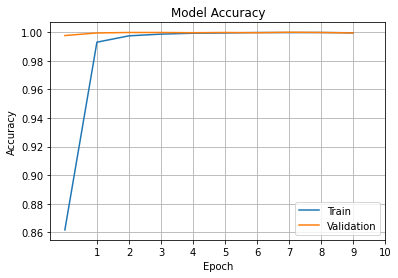

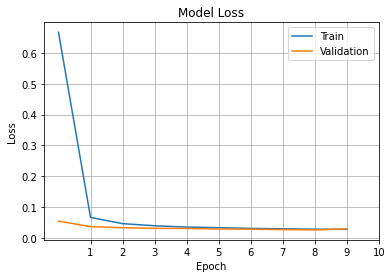

In [23]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(x)
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(b=None, which='major', axis='both')
plt.savefig('fruits_classifier-training_acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(x)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(b=None, which='major', axis='both')

plt.savefig('fruits_classifier-training_loss.png')
plt.show()

###Testando o Modelo

In [1]:
results = model.evaluate(x=x_test, y=y_test, batch_size=batch_size, verbose=1)
print('Testing Loss, Testing Acc: ', [round(r,4) for r in results])

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

NameError: ignored

###Acurácia

In [ ]:
print('Accuracy', round(accuracy_score(y_test, y_pred),4))
print('Classification report', classification_report(y_test, y_pred, target_names = fruitsNames))

###Plotando a matriz de confusão

In [ ]:
cmat = confusion_matrix(np.asarray(y_test), y_pred, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels = fruitsNames)
disp.plot(cmap='Blues', xticks_rotation='vertical', values_format='.2f')
plt.show()